In [12]:
import seisbench
import seisbench.data as sbd

2024-10-20 03:02:46,090 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.
Preloading waveforms: 100%|██████████| 100/100 [00:00<00:00, 6849.07it/s]


DummyDataset - 100 traces
Cache root: /home/henry/.seisbench
Contents: ['config.json', 'datasets']
datasets: ['dummydataset']
dummydataset: ['waveforms.hdf5', 'metadata.csv']


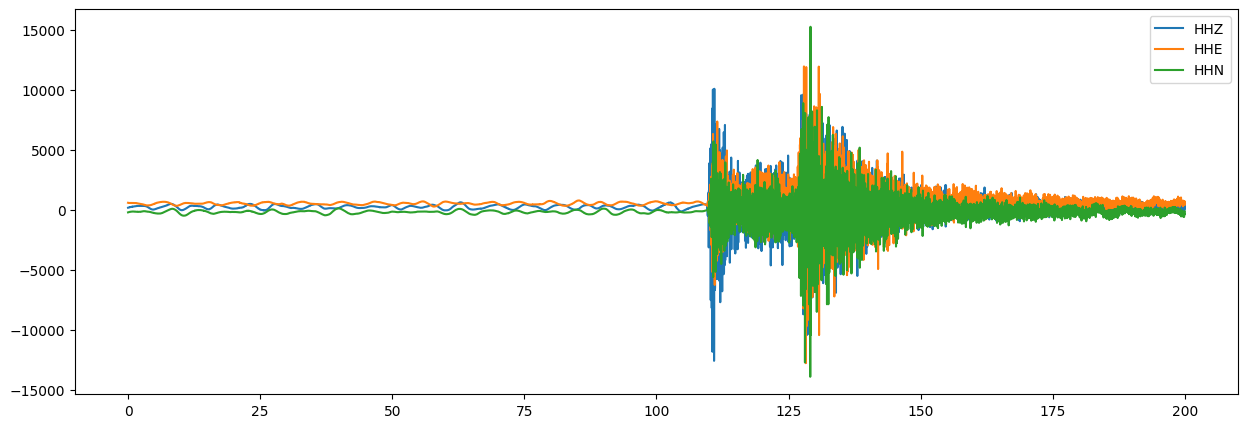

In [13]:
# stores only metadata.csv in memory. waveforms.hdf5 loaded into memory when requestes. Bad for deep learning training. Preload with cache='... and preload_waveforms...
# As a rule of thumb, trace should be used if you only need a small fraction of the dataset, while full is better suited when using most of the dataset or 
# a full train/dev/test split. Note that full might cache traces that you did not actually filter for

# In general, when preloading and filtering a dataset, you should always first filter it and then preload to avoid loading unnecessary traces.
# mask = data.metadata["source_magnitude"] > 2.5  # Only select events with magnitude above 2.5
# data.filter(mask)
data = sbd.DummyDataset(cache='trace')
data.preload_waveforms(pbar=True)
print(data)

# train, dev, test split    train, dev, test = data.train_dev_test()
import os
print("Cache root:", seisbench.cache_root)
print("Contents:", os.listdir(seisbench.cache_root))
print("datasets:", os.listdir(seisbench.cache_root / "datasets"))
print("dummydataset:", os.listdir(seisbench.cache_root / "datasets" / "dummydataset"))

from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

client = Client("GFZ")

t = UTCDateTime("2007/01/02 05:48:50")
stream = client.get_waveforms(network="CX", station="PB01", location="*", channel="HH?", starttime=t-100, endtime=t+100)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
for i in range(3):
    ax.plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
ax.legend()


In [17]:
stream[0].data.min()

-12555